## Modelo **Lotka–Volterra (depredador–presa)**

Las interacciones ecológicas entre una *población de presas* y una *población de depredadores* pueden modelarse, en primera aproximación, con dos variables en tiempo discreto $t$: **presas** $X_t$ y **depredadores** $Y_t$. A diferencia del modelo SI, aquí la **población total** $X_t+Y_t$ **no** se conserva (las presas se reproducen y los depredadores mueren o aumentan al consumir presas).

**Supuestos clave:**  
1. **Ecosistema cerrado** (sin inmigración, emigración ni cosecha).  
2. **Mezcla homogénea** (encuentros presa–depredador proporcionales a $X_tY_t$).  
3. **Pasos de tiempo discretos** de duración fija (por ejemplo, días).  
4. **Parámetros constantes por paso**: tasas $\alpha,\beta,\gamma,\delta>0$.  
5. **Sin autorregulación ni saciedad**: no hay capacidad de carga para presas(crecen sin cota) ni saturación de depredación(siempre derpedan).

Condiciones iniciales con sentido biológico: $X_0>0$, $Y_0>0$.

### **Variables:**
- $X_t$: tamaño de la población de **presas** en el tiempo $t$.  
- $Y_t$: tamaño de la población de **depredadores** en el tiempo $t$.

### **Parámetros:**
- $\alpha>0$: **crecimiento intrínseco** de las presas por paso.  
- $\beta>0$: **tasa de encuentro/predación** por interacción presa–depredador.  
- $\gamma>0$: **mortalidad natural** de los depredadores por paso.  
- $\delta>0$: **eficiencia de conversión** (presas consumidas que se transforman en nuevos depredadores).

### **Ecuaciones:**
$$
\begin{aligned}
X_{t+1} &= X_t + (\alpha X_t - \beta X_t Y_t),\\
Y_{t+1} &= Y_t + (-\gamma Y_t + \delta X_t Y_t).
\end{aligned}
$$


> Modelo con paso explícito $\Delta t$:  
> $$
> \begin{aligned}
> X_{t+1} &= X_t + \Delta t(\alpha X_t - \beta X_t Y_t),\\
> Y_{t+1} &= Y_t + \Delta t(-\gamma Y_t + \delta X_t Y_t).
> \end{aligned}
> $$

**¿Porqué es util introducior un paso explicito a los modelos?**

Introducir un paso explícito $\Delta t$ hace el modelo más transparente y controlable: fija las unidades de tiempo de las tasas, permite ajustar la resolución (más pequeño $\Delta t$ ⇒ mayor detalle y precisión numérica), facilita comparar simulaciones sobre el mismo horizonte temporal cambiando solo la malla, ayuda a analizar estabilidad y errores de discretización, y alinea la simulación con la frecuencia de muestreo de datos reales (p.ej., diario vs. semanal) sin reescalar arbitrariamente los parámetros.


**¿Cómo mantener el mismo intervalo de tiempo al usar un paso más pequeño $\Delta t$?**

Cuando pasas de un esquema “por paso” a uno con **paso explícito** $\Delta t$, piensa en dos escalas:
- **Tiempo físico** (p. ej., días, semanas): denótalo por $T$.
- **Pasos de simulación**: denótalos por $N$.

Para **conservar el mismo intervalo físico** pero con mayor resolución temporal:

1. **Fija el horizonte físico** que quieres cubrir (p. ej., $T=100$ unidades de tiempo).
2. **Elige el nuevo paso** $\Delta t$ (más pequeño).
3. **Calcula el número de pasos**  
   $$
   N \;=\; \left\lfloor \frac{T}{\Delta t} \right\rfloor
   \quad\text{(o redondea al entero más cercano).}
   $$
4. **Construye la malla temporal**  
   $$
   t_k \;=\; k\,\Delta t,\quad k=0,1,\dots,N,
   $$
   de modo que $t_N\approx T$.

**Conclusión**: para cubrir el mismo tiempo físico con más detalle **solo cambia $\Delta t$ y aumenta $N$** en la misma proporción.
> **Ejemplo rápido**: si antes usabas $\Delta t=1$ y $T=100$ (100 unidades de tiempo),
> con $\Delta t=0.25$ mantén $T=100$ y usa  $N = 100/0.25 = 400$ pasos y la malla $t_k = 0,0.25,\dots,100$.


### **Interpretación del modelo:**
- Las presas **nacen** a tasa $\alpha X_t$ y **mueren por depredación** a tasa $\beta X_tY_t$.  
- Los depredadores **mueren** a tasa $\gamma Y_t$ y **aumentan** al consumir presas a tasa $\delta X_tY_t$.  
- El término bilineal $X_tY_t$ captura que los encuentros (y, por tanto, la depredación) crecen con la **abundancia conjunta** de presas y depredadores.  
- El sistema puede exhibir **oscilaciones** alrededor de un equilibrio interno; en tiempo discreto la estabilidad depende de los valores de los parámetros y del tamaño del paso.


### **Ejercicio 1. Simulación y visualización del modelo Lotka–Volterra**

Escribe una función en Python llamada `simular_LotkaVolterra` que reciba los parámetros del modelo y devuelva la evolución temporal de las poblaciones de presas y depredadores.

#### **Instrucciones:**

1. Define la función con la siguiente firma:

```python
def simular_LotkaVolterra(alpha: float, beta: float, gamma: float, delta: float, 
                           X0: float, Y0: float, T: int, paso: float):
    """
    Simula el modelo depredador–presa de Lotka–Volterra en tiempo discreto durante T pasos.

    Parámetros
    ----------
    alpha : float
        Tasa de crecimiento de las presas (α > 0).
    beta : float
        Tasa de depredación (β > 0).
    gamma : float
        Tasa de mortalidad de los depredadores (γ > 0).
    delta : float
        Eficiencia de conversión de presas en depredadores (δ > 0).
    X0 : float
        Población inicial de presas (X0 > 0).
    Y0 : float
        Población inicial de depredadores (Y0 > 0).
    T : int
        Número total de pasos de tiempo a simular.
    paso : float, opcional
        Tamaño del paso temporal (Δt). Controla la resolución de la simulación.
        Un paso más pequeño mejora la precisión numérica y permite observar con mayor detalle
        la evolución de las poblaciones.

    Retorna
    -------
    X : np.ndarray
        Serie temporal con la población de presas en cada paso.
    Y : np.ndarray
        Serie temporal con la población de depredadores en cada paso.
    """
    pass
```
2. Implementa dentro de la función las ecuaciones del modelo Lotka–Volterra con paso $\Delta t$.
3. Crea un bloque que grafique las curvas $X_t$ e $Y_t$ en función del tiempo utilizando `matplotlib.pyplot`.
Representa las presas con una línea azul y los depredadores con una línea roja.
4. Comprueba tu función con los valores:

- $\alpha = 0.6$

- $\beta = 0.02$

- $\gamma = 0.4$

- $\delta = 0.01$

- $X_0 = 40$

- $Y_0 = 9$

- $T = 1000$

- $\Delta t = 0.1$

¿Qué tipo de comportamiento observas entre las poblaciones?

¿Qué diferencias observas al variar el tamaño del paso $\Delta t$?

In [1]:
import numpy as np

def simular_LotkaVolterra(alpha: float, beta: float, gamma: float, delta: float,
                           X0: float, Y0: float, T: int, paso: float = 0.1):
    """
    Simula el modelo depredador–presa de Lotka–Volterra con paso explícito Δt.

    Parámetros
    ----------
    alpha : float
        Tasa de crecimiento de las presas (α > 0).
    beta : float
        Tasa de depredación (β > 0).
    gamma : float
        Tasa de mortalidad de los depredadores (γ > 0).
    delta : float
        Eficiencia de conversión de presas en depredadores (δ > 0).
    X0 : float
        Población inicial de presas (X0 > 0).
    Y0 : float
        Población inicial de depredadores (Y0 > 0).
    T : int
        Número total de pasos de tiempo a simular.
    paso : float, opcional
        Tamaño del paso temporal Δt. Permite ajustar la resolución de la simulación
        y obtener una representación más precisa de la dinámica.

    Retorna
    -------
    X : np.ndarray
        Serie temporal con la población de presas en cada paso (longitud T+1).
    Y : np.ndarray
        Serie temporal con la población de depredadores en cada paso (longitud T+1).
    """
    if any(p <= 0 for p in [alpha, beta, gamma, delta]):
        raise ValueError("Se requieren α, β, γ, δ > 0.")
    if X0 <= 0 or Y0 <= 0:
        raise ValueError("Se requiere X0 > 0 y Y0 > 0.")
    if T < 1:
        raise ValueError("Se requiere T ≥ 1.")
    if paso <= 0:
        raise ValueError("El tamaño de paso Δt debe ser positivo.")

    X = np.zeros(T+1, dtype=float)
    Y = np.zeros(T+1, dtype=float)
    X[0], Y[0] = X0, Y0

    for t in range(T):
        dX = alpha*X[t] - beta*X[t]*Y[t]
        dY = -gamma*Y[t] + delta*X[t]*Y[t]
        X[t+1] = max(0.0, X[t] + paso * dX)  # actualiza con Δt
        Y[t+1] = max(0.0, Y[t] + paso * dY)

    return X, Y


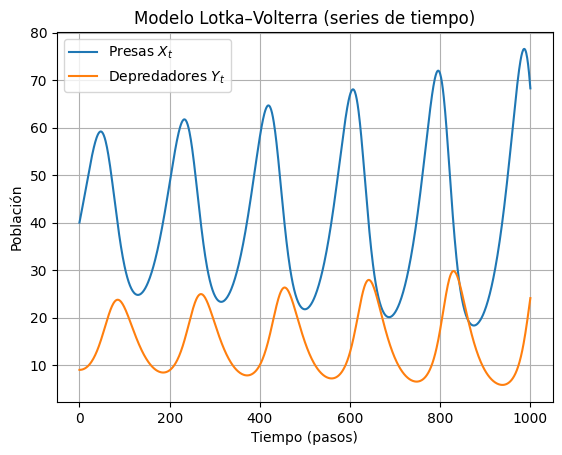

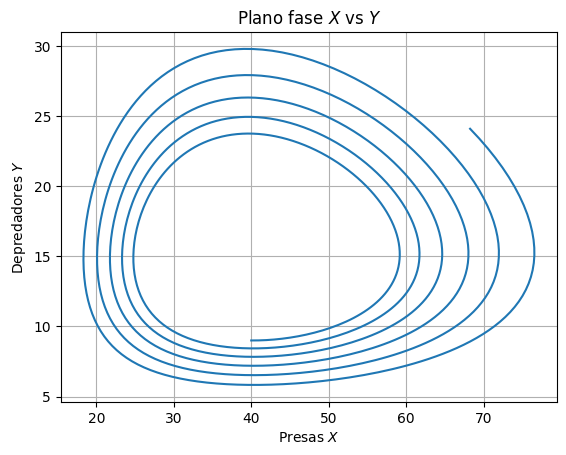

In [2]:
import matplotlib.pyplot as plt

# Parámetros de prueba
alpha = 0.3
beta  = 0.02
gamma = 0.4
delta = 0.01
X0, Y0 = 40.0, 9.0
T = 1000

# Simulación
X, Y = simular_LotkaVolterra(alpha, beta, gamma, delta, X0, Y0, T)
t = np.arange(T+1)

# 1) Series de tiempo
plt.figure()
plt.plot(t, X, label="Presas $X_t$")
plt.plot(t, Y, label="Depredadores $Y_t$")
plt.xlabel("Tiempo (pasos)")
plt.ylabel("Población")
plt.title("Modelo Lotka–Volterra (series de tiempo)")
plt.legend()
plt.grid(True)
plt.show()

# 2) Plano fase (X vs Y)
plt.figure()
plt.plot(X, Y)
plt.xlabel("Presas $X$")
plt.ylabel("Depredadores $Y$")
plt.title("Plano fase $X$ vs $Y$")
plt.grid(True)
plt.show()

###  Pregunta LV-1 ( punto fijo)
Con $X_0=\dfrac{\gamma}{\delta}$ y $Y_0=\dfrac{\alpha}{\beta}$:
1. ¿Permanece la simulación exactamente en el punto fijo para $t=0,\dots,T$?  
2. Si haces una **perturbación mínima** (por ejemplo $X_0=\dfrac{\gamma}{\delta}(1+10^{-3})$), ¿Qué sucede?


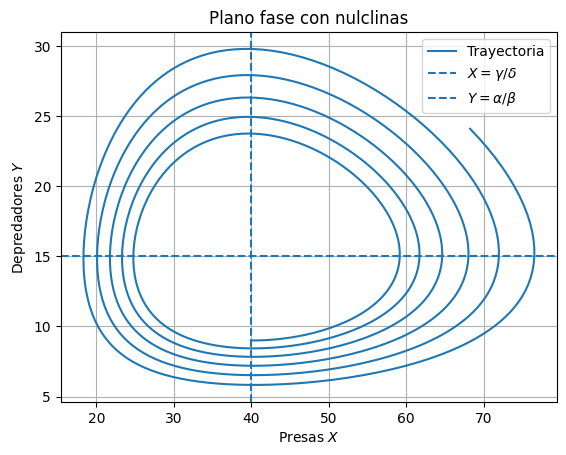

In [3]:
# Tras simular X, Y:
Xeq = gamma/delta
Yeq = alpha/beta

plt.figure()
plt.plot(X, Y, label="Trayectoria")
plt.axvline(Xeq, linestyle="--", label=r"$X=\gamma/\delta$")
plt.axhline(Yeq, linestyle="--", label=r"$Y=\alpha/\beta$")
plt.xlabel("Presas $X$")
plt.ylabel("Depredadores $Y$")
plt.title("Plano fase con nulclinas")
plt.legend()
plt.grid(True)
plt.show()

### Pregunta LV-2 (cerca de los ejes)
1. Toma $X_0$ pequeño y $Y_0$ moderado (por ejemplo $X_0=1$, $Y_0=9$). ¿Tiende $X_t$ a **extinguirse** o se recupera?  
2. Toma $Y_0$ pequeño y $X_0$ moderado (por ejemplo $Y_0=0.5$, $X_0=40$). ¿Los depredadores logran **establecerse** o **colapsan**?


### Pregunta LV-3 (plano fase y nulclinas)
1. Grafica la curva $X$ vs $Y$ y **superpón** las rectas $X=\gamma/\delta$ y $Y=\alpha/\beta$.  
2. ¿En qué regiones del plano fase $X$ **crece** o **disminuye**? ¿Y para la variable $Y$?  
3. ¿Cómo se relaciona el **sentido de giro** de la órbita con estas regiones?


### Pregunta LV-4 (sensibilidad a parámetros)
1. Duplica $\alpha$ manteniendo los demás parámetros. ¿Cómo cambia la **amplitud** y el **periodo** de las oscilaciones?  
2. Incrementa $\beta$ (depredación más intensa). ¿Aumenta la **frecuencia** de los ciclos? ¿Se reducen los picos de $X$?  
3. Disminuye $\gamma$ (menor mortalidad del depredador). ¿Se eleva el nivel medio de $Y$?


### Pregunta LV-6 (comparar condiciones iniciales con el mismo punto fijo)
El punto fijo interno con los parámetros de prueba es
$$
X^*=\frac{\gamma}{\delta}=\frac{0.4}{0.01}=40,\qquad
Y^*=\frac{\alpha}{\beta}=\frac{0.6}{0.02}=30.
$$
1. Compara tres simulaciones con $(X_0,Y_0)\in\{(35,30),\ (40,30),\ (45,30)\}$.  
2. ¿Cómo cambia la **fase** del ciclo y la cercanía de las órbitas al punto fijo?  
3. ¿Qué sucede si empiezas en $(X_0,Y_0)=(40,30)$ exactamente?
